In [1]:
import lib.csv_helpers as csv
from IPython.display import display
import shutil

#Delete any existing dummy data
shutil.rmtree('dummydata')

## Generate Dummy Data
for testing / demo purposes.
Includes random surface chemistry mapping

In [2]:
print(csv.setup)

{'metafile': 'index.txt', 'path': 'dummydata', 'subdirs': ['sensor', 'fluid'], 'fluids': ['waterA', 'waterB', 'waterC'], 'elements': 'all', 'repeats': 3, 'wavelength_range': [400, 420, 0.5], 'primary_metadata': ['instrument', 'element', 'fluid'], 'comment': '', 'instrument': {'name': 'instrument01', 'sensor': 'DUM01', 'element_map': {'A01': 'Al', 'A02': 'Au', 'B01': 'Al-HMDS', 'B02': 'Au-DT', 'C01': 'Al-PEG', 'C02': 'Au-PFDT'}, 'light Source': 'Stellarnet LED White', 'spectrometer': 'Stellarnet BlueWave VIS-25'}}


In [16]:
import lib.csv_helpers as csv
from IPython.display import display

print("Generating metadata run list with the following settings")

# Start with the example setup dictionary
setup = csv.get_default_setup()

# Modify any of the example settings
setup['path'] = 'dummydata'
setup['subdirs'] = ['sensor', 'fluid']
setup['instrument']['sensor'] = 'DUM01'
setup['fluids'] = ['waterA', 'waterB']
setup['repeats'] = 2
setup['wavelength_range'] = [540, 730, 0.5]


display(setup)

run_df = csv.generate_run_df(setup)

# Iterate through the run_df calling dummy_measurement for each row,
# Stores the results in the path/subdirs defined in setup. 
csv.run_measure(setup, run_df, measure_func=csv.dummy_measurement)
csv.write_instrument_json(setup)
csv.write_setup_json(setup)




Generating metadata run list with the following settings


{'metafile': 'index.txt',
 'path': 'dummydata',
 'subdirs': ['sensor', 'fluid'],
 'fluids': ['waterA', 'waterB'],
 'elements': 'all',
 'repeats': 2,
 'wavelength_range': [540, 730, 0.5],
 'primary_metadata': ['instrument', 'element', 'fluid'],
 'comment': '',
 'instrument': {'name': 'instrument01',
  'sensor': 'DUM01',
  'element_map': {'A01': 'Al',
   'A02': 'Au',
   'B01': 'Al-HMDS',
   'B02': 'Au-DT',
   'C01': 'Al-PEG',
   'C02': 'Au-PFDT'},
  'light Source': 'Stellarnet LED White',
  'spectrometer': 'Stellarnet BlueWave VIS-25'}}

INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-A01-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-A01-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-A02-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-A02-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-B01-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-B01-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-B02-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-B02-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-C01-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-C01-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-C02-waterA.txt
INFO:root:Merging into existing dummydata/DUM01/waterA/instrument01-C02-waterA.txt
INFO

## Preview of csv spectrometer data
Simply displaying a csv measurement file with pandas

In [4]:
import os
import pandas as pd

# pd.options.display.max_rows= 15
dir = "dummydata/DUM01/waterA/"
testfile = "instrument01-A01-waterA.txt"
df = pd.read_csv(os.path.join(dir, testfile), sep='\t')

#label columns
reps = len(df.columns)-1
col_names = ['wavelength']
for r in range(reps):
	col_names.append(F"rep{r+1}")
df.columns = col_names
df

,wavelength,rep1,rep2
0,400.0,0.624499,0.366823
1,400.5,0.747181,0.088526
2,401.0,0.270654,0.998937
3,401.5,0.880034,0.788643
4,402.0,0.012613,0.141920
5,402.5,0.327811,0.922155
6,403.0,0.150225,0.988896
7,403.5,0.917715,0.674235
8,404.0,0.828764,0.802536
9,404.5,0.757034,0.465524


## Import from .txt or .csv files

### Input File

Requires a text file with at least 2 columns.
(They don't need to be named in the file)

[wavelength]	[transmission data 1]	...[transmission data n (optional)]

The default is for tab separation, but can be specified with:

separator = '\t'

### Regex
A regular expression must be provided to identify these Primary metadata fields from the filename:
* sensor
* element
* fluid

Optionally, extra fields can be identified, which will be added to the metadata:
* e.g. rotation


In [6]:
import lib.csv_helpers as csv

#Folder containing text/csv files to import
input_dir = "/Users/calum/git/Glasgow/sampleData/combined"

# Construct a regex to extract metadata from the filename
# example 'HAN24_Sensor9_BeerBitter3_Rotation2.txt'
# regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(?P<rotation>.+).txt'
regex = '(?P<sensor>.+)_Sensor(?P<element>.+)_(?P<fluid>.+)_Rotation(.+).txt'

setup = csv.get_default_setup()

# Modify any of the example settings
setup['path'] = 'dummydata'
setup['instrument']['name'] = 'HAN24import01'
setup['instrument']['element_map'] = {
    '01'    : 'surfaceA',
    '02'    : 'surfaceB',
    '03'    : 'surfaceC',
    '04'    : 'surfaceD',
    '05'    : 'surfaceE',
    '06'    : 'surfaceF',
    '07'    : 'surfaceG',
    '08'    : 'surfaceH',
    '09'    : 'surfaceI',
    '10'    : 'surfaceJ',
    '11'    : 'surfaceK',
    '12'    : 'surfaceL',
    '13'    : 'surfaceM',
    '14'    : 'surfaceN',
    '15'    : 'surfaceO',
}

csv.import_dir_to_csv(setup, input_dir, regex)
csv.write_setup_json(setup)
csv.write_instrument_json(setup)


INFO:root:Merging into existing dummydata/HAN24/BeerBitter1/HAN24import01-10-BeerBitter1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter1/HAN24import01-10-BeerBitter1.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter2/HAN24import01-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter2/HAN24import01-10-BeerBitter2.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter3/HAN24import01-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerBitter3/HAN24import01-10-BeerBitter3.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/HAN24/BeerCorny1/HAN24import01-10-BeerCorny1.txt
INFO:root:Merging into existing dummyda

## Example of searching by metadata

select_from_metadata() returns a list of h5 nodes that match the
criteria.

It can search a full h5 file, or if a nodelist is provided, it will work from
that.

Search criteria must include a metadata key, and can optionally include a
metadata value

In [11]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

meta_df = csv.select_from_metadata('sensor', 'HAN24', meta_df)
# meta_df = csv.select_from_metadata('element', '03', meta_df)

meta_df


INFO:root:filtering by metadata "sensor" == "HAN24"


,date,instrument,sensor,element,surface,fluid,repeats,comment
index,,,,,,,,
HAN24import01-10-BeerBitter1,2022-03-11,HAN24import01,HAN24,10,surfaceJ,BeerBitter1,12,<NA>
HAN24import01-10-BeerBitter2,2022-03-11,HAN24import01,HAN24,10,surfaceJ,BeerBitter2,12,<NA>
HAN24import01-10-BeerBitter3,2022-03-11,HAN24import01,HAN24,10,surfaceJ,BeerBitter3,12,<NA>
HAN24import01-10-BeerCorny1,2022-03-11,HAN24import01,HAN24,10,surfaceJ,BeerCorny1,12,<NA>
HAN24import01-10-BeerCorny2,2022-03-11,HAN24import01,HAN24,10,surfaceJ,BeerCorny2,12,<NA>
...,...,...,...,...,...,...,...,...
HAN24import01-09-BeerCorny3,2022-03-11,HAN24import01,HAN24,09,surfaceI,BeerCorny3,12,<NA>
HAN24import01-09-BeerMusty1,2022-03-11,HAN24import01,HAN24,09,surfaceI,BeerMusty1,12,<NA>
HAN24import01-09-BeerMusty2,2022-03-11,HAN24import01,HAN24,09,surfaceI,BeerMusty2,12,<NA>


## Export with Preprocessing

export_dataframes() takes a meta_df listing which measurements to export.
(In this case we select only fluid==Beer from the full set)

A DataProcessor object may also be passed, which will be applied to the
measurements during export.




In [17]:
import lib.csv_helpers as csv
import lib.data_process

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)
# selection = csv.select_from_metadata('fluid', 'Beer', meta_df)
meta_df = csv.select_from_metadata('sensor', 'DUM01', meta_df)

dp = lib.data_process.DataProcessor()
dp.apply_normalise = True
dp.apply_smooth = True
dp.apply_trim = True
dp.apply_interpolate = True
dp.apply_round = True

dp.smooth_points = 3
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730
dp.round_decimals = 3
dp.interpolate_sampling_rate = 1.0

export = csv.export_dataframes(setup, meta_df, dp=dp, outfile='export.txt')
export


INFO:root:filtering by metadata "sensor" == "DUM01"


,date,instrument,sensor,element,surface,fluid,repeats,comment
index,,,,,,,,
instrument01-A01-waterA,2022-03-11,instrument01,DUM01,A01,Al,waterA,4,<NA>
instrument01-A02-waterA,2022-03-11,instrument01,DUM01,A02,Au,waterA,4,<NA>
instrument01-B01-waterA,2022-03-11,instrument01,DUM01,B01,Al-HMDS,waterA,4,<NA>
instrument01-B02-waterA,2022-03-11,instrument01,DUM01,B02,Au-DT,waterA,4,<NA>
instrument01-C01-waterA,2022-03-11,instrument01,DUM01,C01,Al-PEG,waterA,4,<NA>
instrument01-C02-waterA,2022-03-11,instrument01,DUM01,C02,Au-PFDT,waterA,4,<NA>
instrument01-A01-waterB,2022-03-11,instrument01,DUM01,A01,Al,waterB,4,<NA>
instrument01-A02-waterB,2022-03-11,instrument01,DUM01,A02,Au,waterB,4,<NA>
instrument01-B01-waterB,2022-03-11,instrument01,DUM01,B01,Al-HMDS,waterB,4,<NA>


INFO:root:merging element A01
INFO:root:filtering by metadata "element" == "A01"
INFO:root:merging element A02
INFO:root:filtering by metadata "element" == "A02"
INFO:root:merging element B01
INFO:root:filtering by metadata "element" == "B01"
INFO:root:merging element B02
INFO:root:filtering by metadata "element" == "B02"
INFO:root:merging element C01
INFO:root:filtering by metadata "element" == "C01"
INFO:root:merging element C02
INFO:root:filtering by metadata "element" == "C02"
INFO:root:Writing to export.txt ...
INFO:root:Done


Surface          Al                                                          \
Element         A01                                                           
Wavelength    540.5  541.5  542.5  543.5  544.5  545.5  546.5  547.5  548.5   
waterA_rep01  0.389  0.691  0.488  0.428  0.432  0.636  0.647  0.774  0.474   
waterA_rep02  0.403  0.593  0.270  0.500  0.739  0.243  0.159  0.376  0.645   
waterA_rep03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
waterA_rep04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
waterB_rep01  0.453  0.521  0.560  0.670  0.698  0.445  0.398  0.140  0.534   
waterB_rep02  0.560  0.625  0.558  0.179  0.520  0.597  0.871  0.753  0.429   
waterB_rep03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
waterB_rep04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Surface              ... Au-PFDT                                            \
Element              ...     C02                                             
Wavelength    549.5  ...   719.5  720.5  721.5  722.5  723.5  724.5  725.5   
waterA_rep01  0.303  ...   0.413  0.555  0.634  0.520  0.298  0.531  0.311   
waterA_rep02  0.780  ...   0.474  0.323  0.518  0.461  0.229  0.550  0.540   
waterA_rep03    NaN  ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
waterA_rep04    NaN  ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
waterB_rep01  0.517  ...   0.232  0.261  0.476  0.530  0.402  0.473  0.500   
waterB_rep02  0.434  ...   0.366  0.390  0.607  0.694  0.735  0.688  0.692   
waterB_rep03    NaN  ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
waterB_rep04    NaN  ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Surface                            
Element                            
Wavelength    726.5  727.5  728.5  
waterA_rep01  0.267  0.220  0.451  
waterA_rep02  0.483  0.262  0.572  
waterA_rep03    NaN    NaN    NaN  
waterA_rep04    NaN    NaN    NaN  
waterB_rep01  0.516  0.573  0.353  
waterB_rep02  0.595  0.586  0.431  
waterB_rep03    NaN    NaN    NaN  
waterB_rep04    NaN    NaN    NaN  

[8 rows x 1134 columns]

## Filter and plot data

In [19]:
csv.default_setup

{'metafile': 'index.txt',
 'path': 'dummydata',
 'subdirs': ['sensor', 'fluid'],
 'fluids': ['waterA', 'waterB', 'waterC'],
 'elements': 'all',
 'repeats': 3,
 'wavelength_range': [400, 420, 0.5],
 'primary_metadata': ['instrument', 'element', 'fluid'],
 'comment': '',
 'instrument': {'name': 'instrument01',
  'sensor': 'DUM01',
  'element_map': {'A01': 'Al',
   'A02': 'Au',
   'B01': 'Al-HMDS',
   'B02': 'Au-DT',
   'C01': 'Al-PEG',
   'C02': 'Au-PFDT'},
  'light Source': 'Stellarnet LED White',
  'spectrometer': 'Stellarnet BlueWave VIS-25'}}

,date,instrument,sensor,element,surface,fluid,repeats,comment
index,,,,,,,,
instrument01-A01-waterA,2022-03-11,instrument01,DUM01,A01,Al,waterA,4,<NA>
instrument01-A02-waterA,2022-03-11,instrument01,DUM01,A02,Au,waterA,4,<NA>
instrument01-B01-waterA,2022-03-11,instrument01,DUM01,B01,Al-HMDS,waterA,4,<NA>
instrument01-B02-waterA,2022-03-11,instrument01,DUM01,B02,Au-DT,waterA,4,<NA>
instrument01-C01-waterA,2022-03-11,instrument01,DUM01,C01,Al-PEG,waterA,4,<NA>
...,...,...,...,...,...,...,...,...
HAN24import01-09-BeerCorny3,2022-03-11,HAN24import01,HAN24,09,surfaceI,BeerCorny3,12,<NA>
HAN24import01-09-BeerMusty1,2022-03-11,HAN24import01,HAN24,09,surfaceI,BeerMusty1,12,<NA>
HAN24import01-09-BeerMusty2,2022-03-11,HAN24import01,HAN24,09,surfaceI,BeerMusty2,12,<NA>


INFO:root:filtering by metadata "element" == "01"


instrument: HAN24import01
element: 01


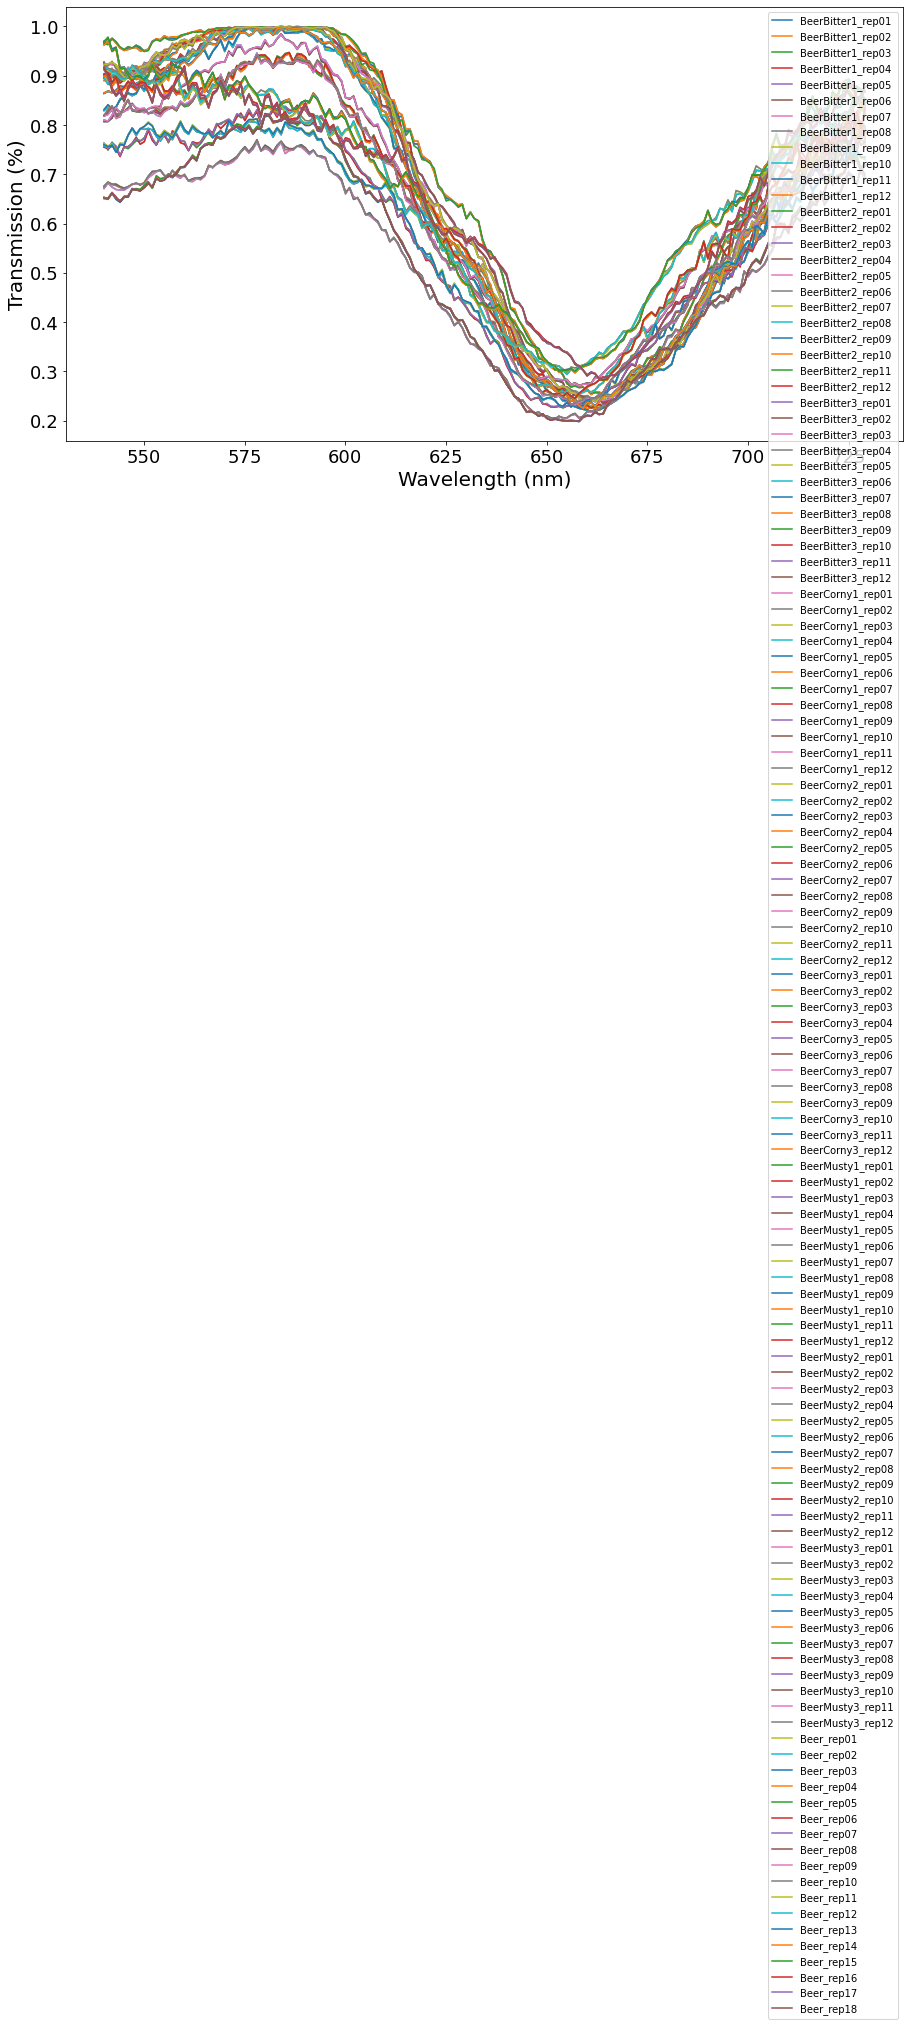

In [20]:
import lib.data_process
import os
import pandas as pd
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

dp = lib.data_process.DataProcessor()
dp.apply_interpolate = True
dp.apply_normalise = True
dp.apply_trim = True
dp.apply_smooth = True

meta_df = csv.select_from_metadata('element', '01', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)
df = dp.process_dataframe(merged_df)
print(title)
df

lib.data_process.plot(df)


In [21]:
import lib.data_process
import os
import pandas as pd
import lib.csv_helpers as csv

setup = csv.get_default_setup()
meta_df = csv.read_metadata(setup)

dp = lib.data_process.DataProcessor()
dp.apply_interpolate = True
dp.apply_normalise = True
dp.apply_trim = True
dp.apply_smooth = True

meta_df = csv.select_from_metadata('element', '01', meta_df)

merged_df, title = csv.merge_dataframes(setup, meta_df)

merged_df

INFO:root:filtering by metadata "element" == "01"


,wavelength,BeerBitter1_rep01,BeerBitter1_rep02,BeerBitter1_rep03,BeerBitter1_rep04,BeerBitter1_rep05,BeerBitter1_rep06,BeerBitter1_rep07,BeerBitter1_rep08,BeerBitter1_rep09,...,Beer_rep09,Beer_rep10,Beer_rep11,Beer_rep12,Beer_rep13,Beer_rep14,Beer_rep15,Beer_rep16,Beer_rep17,Beer_rep18
0,457.131,97.54,97.46,97.39,97.27,97.31,97.31,97.54,97.46,97.39,...,81.27,84.83,85.14,84.76,82.28,82.30,81.91,81.35,81.35,81.27
1,457.204,97.24,97.28,97.21,97.22,97.17,97.11,97.24,97.28,97.21,...,79.24,83.23,83.01,83.08,80.34,80.79,80.21,79.39,79.52,79.24
2,457.277,86.29,86.65,86.43,86.82,86.51,86.18,86.29,86.65,86.43,...,78.88,83.13,82.69,83.42,80.45,80.63,80.29,79.18,78.98,78.88
3,457.349,84.85,85.18,84.90,85.30,84.90,84.27,84.85,85.18,84.90,...,79.43,83.54,83.13,83.52,80.67,80.56,80.39,79.77,79.76,79.43
4,457.422,84.62,85.00,84.76,84.82,84.31,83.67,84.62,85.00,84.76,...,80.81,83.23,83.36,83.11,80.49,80.38,80.42,80.53,80.45,80.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,730.534,79.51,78.85,79.33,78.67,79.24,78.61,79.51,78.85,79.33,...,80.87,79.83,80.82,80.64,73.01,73.89,74.01,77.66,78.98,80.87
4091,730.598,79.98,78.50,80.04,80.43,79.62,79.38,79.98,78.50,80.04,...,77.46,80.65,78.96,80.84,74.81,75.64,74.94,76.81,77.65,77.46
4092,730.661,81.33,80.21,80.12,81.08,80.78,80.27,81.33,80.21,80.12,...,75.94,81.65,81.90,82.97,74.12,73.61,74.19,79.06,77.87,75.94
4093,730.724,80.82,79.46,79.33,79.27,79.21,78.91,80.82,79.46,79.33,...,82.77,80.53,83.04,81.22,74.25,72.80,73.30,81.01,80.26,82.77


In [3]:
import os
import lib.csv_helpers as csv
import pandas as pd

path='./dummydata'
metapath = os.path.join(path, "index.txt")

csv.bulk_merge(metapath, './dummydata2/index.tsv', delete_input=False)
csv.bulk_merge('./dummydata2/index.tsv', './dummydata2/index.tsv', delete_input=True, out_subdirs='sensor')
# csv.bulk_merge(metapath, './dummydata2/index.tsv', delete_input=True)



INFO:root:Saving into new file ./dummydata2/water/instrument01-A01-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-A02-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-A03-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-A04-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-B01-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-B02-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-B03-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-B04-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-C01-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-C02-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-C03-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-C04-water.txt
INFO:root:Saving into new file ./dummydata2/water/instrument01-D01-water.txt

## Single Measurements

Run some dummy measurements at various wavelengths to check they merge correctly

In [5]:
import lib.csv_helpers as csv

setup = csv.get_default_setup()
element = 'A02'
fluid = 'asdf'

setup['wavelength_range'] = [400, 420, 0.5]
csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
setup['wavelength_range'] = [390, 410, 0.5]
df = csv.simple_measurement(setup, element, fluid, csv.dummy_measurement)
df


INFO:root:Saving into new file dummydata/DUM01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt
INFO:root:Merging into existing dummydata/DUM01/asdf/instrument01-A02-asdf.txt
INFO:root:Merging into existing dummydata/index.txt


,wavelength,1647017609.573877,1647017609.609797
0,390.0,NaN,0.423912
1,390.5,NaN,0.562401
2,391.0,NaN,0.991006
3,391.5,NaN,0.269565
4,392.0,NaN,0.505496
5,392.5,NaN,0.075095
6,393.0,NaN,0.064998
7,393.5,NaN,0.537381
8,394.0,NaN,0.159280
9,394.5,NaN,0.261736
